In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import os


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic
%matplotlib inline

/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from constants import guest_types
from constants import colors
from bootstrap import bootstrap
from bootstrap import dG_bootstrap
from bootstrap import dH_bootstrap
import plotting

In [3]:
from constants import experimental_deltaG
from constants import experimental_deltaH
from constants import systems

# Calculate or load in the summary results

In [4]:
bgbg = pd.read_csv("results/bgbg_tip3p_by_orientation.csv")
bgbg_combined = pd.read_csv("results/bgbg_tip3p_combined.csv")

bg2bg2 = pd.read_csv("results/bg2bg2_tip3p_by_orientation.csv")
bg2bg2_combined = pd.read_csv("results/bg2bg2_tip3p_combined.csv")

smirnoff = pd.read_csv("results/smirnoff_by_orientation.csv")
smirnoff_combined = pd.read_csv("results/smirnoff_combined.csv")

experimental = pd.read_csv("results/experimental.csv")

In [5]:
data_sets = [bgbg_combined, bg2bg2_combined, smirnoff_combined, experimental]
names = ["GAFF v1.7", "GAFF v2.1", "SMIRNOFF99Frosst", "Experimental"]

In [6]:
from itertools import permutations

In [7]:
delta_G_r_squared = pd.DataFrame()
delta_G_rmse = pd.DataFrame()
delta_G_mse = pd.DataFrame()

delta_H_r_squared = pd.DataFrame()
delta_H_rmse = pd.DataFrame()
delta_H_mse = pd.DataFrame()

for index_i, i in enumerate(data_sets):
    for index_j, j in enumerate(data_sets):
                    
        # This seems the most reliable way of matching keys. Took a little while to figure out,
        # even if the data frames are ordered properly.
        df = i.merge(j, on=["System"], suffixes=("_i", "_j"))    
        
        results = bootstrap(df["Delta G_i"], df["G_SEM_i"], df["Delta G_j"], df["G_SEM_j"], cycles=1000)
        print(f"{names[index_i]} -- {names[index_j]} {results['mean']['R**2']}")


        delta_G_r_squared = delta_G_r_squared.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "R**2": results["mean"]["R**2"],
                "R**2 SEM": results["sem"]["R**2"]
            },
            ignore_index=True,
        )

        delta_G_rmse = delta_G_rmse.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "RMSE": results["mean"]["RMSE"],
                "RMSE SEM": results["sem"]["RMSE"]
            },
            ignore_index=True,
        )

        delta_G_mse = delta_G_mse.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "MSE": results["mean"]["MSE"],
                "MSE SEM": results["mean"]["MSE"]
            },
            ignore_index=True,
        )
        
        results = bootstrap(df["Delta H_i"], df["H_SEM_i"], df["Delta H_j"], df["H_SEM_j"], cycles=1000)
        print(f"{names[index_i]} -- {names[index_j]} {results['mean']['R**2']}")
        
        delta_H_r_squared = delta_H_r_squared.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "R**2": results["mean"]["R**2"],
                "R**2 SEM": results["sem"]["R**2"]
                
            },
            ignore_index=True,
        )

        delta_H_rmse = delta_H_rmse.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "RMSE": results["mean"]["RMSE"],
                "RMSE SEM": results["sem"]["RMSE"]
            },
            ignore_index=True,
        )

        delta_H_mse = delta_H_mse.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "MSE": results["mean"]["MSE"],
                "MSE SEM": results["sem"]["MSE"]
            },
            ignore_index=True,
        )


GAFF v1.7 -- GAFF v1.7 0.8633855789097872
GAFF v1.7 -- GAFF v1.7 0.8949388102049061
GAFF v1.7 -- GAFF v2.1 0.5406388829688028
GAFF v1.7 -- GAFF v2.1 0.6091119815970619
GAFF v1.7 -- SMIRNOFF99Frosst 0.5872120592799711
GAFF v1.7 -- SMIRNOFF99Frosst 0.7019429201692048
GAFF v1.7 -- Experimental 0.5342481779468413
GAFF v1.7 -- Experimental 0.3936755568984785
GAFF v2.1 -- GAFF v1.7 0.538127903534604
GAFF v2.1 -- GAFF v1.7 0.6095615728839157
GAFF v2.1 -- GAFF v2.1 0.9569956787133556
GAFF v2.1 -- GAFF v2.1 0.9739275731832029
GAFF v2.1 -- SMIRNOFF99Frosst 0.36735217820903915
GAFF v2.1 -- SMIRNOFF99Frosst 0.6002395969000279
GAFF v2.1 -- Experimental 0.8191219388841698
GAFF v2.1 -- Experimental 0.7497678191144045
SMIRNOFF99Frosst -- GAFF v1.7 0.5914435843847202
SMIRNOFF99Frosst -- GAFF v1.7 0.6971475262551112
SMIRNOFF99Frosst -- GAFF v2.1 0.3683475682044087
SMIRNOFF99Frosst -- GAFF v2.1 0.5933243607398356
SMIRNOFF99Frosst -- SMIRNOFF99Frosst 0.7447076165187979
SMIRNOFF99Frosst -- SMIRNOFF99Frosst

In [8]:
delta_G_r_squared_pivot = delta_G_r_squared.pivot(columns="y", index="x")
delta_G_rmse_pivot = delta_G_rmse.pivot(columns="y", index="x",)
delta_G_mse_pivot = delta_G_mse.pivot(columns="y", index="x",)

delta_H_r_squared_pivot = delta_H_r_squared.pivot(columns="y", index="x", )
delta_H_rmse_pivot = delta_H_rmse.pivot(columns="y", index="x",)
delta_H_mse_pivot = delta_H_mse.pivot(columns="y", index="x", )


In [9]:
pd.options.display.float_format = '{:,.2f}'.format
delta_G_r_squared_pivot

R**2                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.94      0.53      0.82             0.34   
GAFF v1.7                0.53      0.86      0.54             0.59   
GAFF v2.1                0.82      0.54      0.96             0.37   
SMIRNOFF99Frosst         0.34      0.59      0.37             0.74   

                     R**2 SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.08      0.10      0.08             0.11  
GAFF v1.7                0.10      0.04      0.10             0.11  
GAFF v2.1                0.08      0.10      0.01             0.11  
SMIRNOFF99Frosst         0.11      0.12      0.11             0.09

In [10]:
delta_G_rmse_pivot

RMSE                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.21      0.88      1.68             0.91   
GAFF v1.7                0.88      0.37      2.22             0.80   
GAFF v2.1                1.68      2.23      0.29             1.89   
SMIRNOFF99Frosst         0.91      0.79      1.90             0.46   

                     RMSE SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.16      0.09      0.09             0.10  
GAFF v1.7                0.09      0.04      0.12             0.12  
GAFF v2.1                0.09      0.12      0.03             0.13  
SMIRNOFF99Frosst         0.11      0.11      0.14             0.07

In [11]:
delta_G_mse_pivot

MSE                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.00      0.46     -1.56            -0.01   
GAFF v1.7               -0.46     -0.00     -2.01            -0.47   
GAFF v2.1                1.56      2.02     -0.00             1.54   
SMIRNOFF99Frosst         0.01      0.47     -1.54             0.00   

                      MSE SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.00      0.46     -1.56            -0.01  
GAFF v1.7               -0.46     -0.00     -2.01            -0.47  
GAFF v2.1                1.56      2.02     -0.00             1.54  
SMIRNOFF99Frosst         0.01      0.47     -1.54             0.00

In [12]:
delta_H_r_squared_pivot

R**2                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.99      0.39      0.75             0.44   
GAFF v1.7                0.39      0.89      0.61             0.70   
GAFF v2.1                0.75      0.61      0.97             0.60   
SMIRNOFF99Frosst         0.44      0.70      0.59             0.89   

                     R**2 SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.01      0.12      0.08             0.12  
GAFF v1.7                0.12      0.04      0.10             0.09  
GAFF v2.1                0.08      0.10      0.01             0.10  
SMIRNOFF99Frosst         0.11      0.09      0.10             0.04

In [13]:
delta_H_rmse_pivot

RMSE                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.15      2.55      2.21             1.85   
GAFF v1.7                2.54      0.71      3.88             1.65   
GAFF v2.1                2.20      3.88      0.44             2.96   
SMIRNOFF99Frosst         1.86      1.65      2.97             0.75   

                     RMSE SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.06      0.24      0.22             0.23  
GAFF v1.7                0.24      0.11      0.21             0.19  
GAFF v2.1                0.23      0.22      0.05             0.23  
SMIRNOFF99Frosst         0.22      0.17      0.23             0.12

In [14]:
delta_H_mse_pivot

MSE                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.00      1.85     -1.64             0.77   
GAFF v1.7               -1.84     -0.00     -3.48            -1.08   
GAFF v2.1                1.63      3.48      0.00             2.40   
SMIRNOFF99Frosst        -0.77      1.08     -2.41            -0.00   

                      MSE SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.03      0.27      0.22             0.27  
GAFF v1.7                0.27      0.11      0.26             0.20  
GAFF v2.1                0.23      0.27      0.07             0.27  
SMIRNOFF99Frosst         0.26      0.19      0.27             0.11

NameError: name 'ListedColormap' is not defined

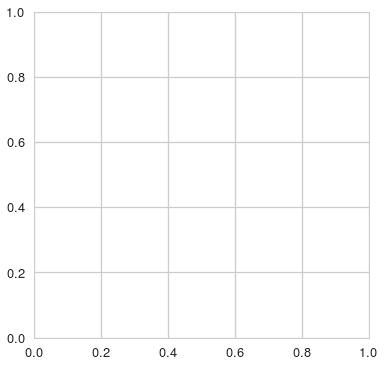

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_G_r_squared_pivot["R**2"], annot=True, fmt=".2f", square=True, ax=ax, 
            cmap=ListedColormap(['white']), 
            cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta G$: R$^2$ cross correlation")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_G_rmse_pivot["RMSE"], annot=True, fmt=".2f", square=True, ax=ax,
            cmap=ListedColormap(['white']), 
            cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta G$: RMSE cross correlation")


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_G_mse_pivot["MSE"], annot=True, fmt=".2f", square=True, ax=ax, cmap=sns.color_palette("RdBu_r"), cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta G$: MSE cross correlation")

In [ ]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_H_r_squared_pivot["R**2"], annot=True, fmt=".2f", square=True, ax=ax, cmap=ListedColormap(['white']), 
            cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta H$: R$^2$ cross correlation")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_H_rmse_pivot["RMSE"], annot=True, fmt=".2f", square=True, ax=ax, cmap=ListedColormap(['white']), 
            cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta H$: RMSE cross correlation")


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_H_mse_pivot["MSE"], annot=True, fmt=".2f", square=True, ax=ax, cmap=sns.color_palette("RdBu_r"), 
            cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta H$: MSE cross correlation")

In [ ]:
r_squared = pd.DataFrame()
rmse = pd.DataFrame()

for index_i, i in enumerate(data_sets):
    for index_j, j in enumerate(data_sets):
                    
        # This seems the most reliable way of matching keys. Took a little while to figure out,
        # even if the data frames are ordered properly.
        df = i.merge(j, on=["System"], suffixes=("_i", "_j"))    
            
        results = bootstrap(df["Delta H_i"], df["H_SEM_i"], df["Delta H_j"], df["H_SEM_j"], cycles=1000)
        print(f"{names[index_i]} -- {names[index_j]} {results['mean']['R**2']}")
        
        
        r_squared = r_squared.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "R**2": results["mean"]["R**2"]
            },
            ignore_index=True,
        )
        
        rmse = rmse.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "RMSE": results["mean"]["RMSE"]
            },
            ignore_index=True,
        )


In [ ]:
r_squared_pivot = r_squared.pivot(columns="y", index="x", values="R**2")
rmse_pivot = rmse.pivot(columns="y", index="x", values="RMSE")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(r_squared_pivot, annot=True, fmt=".2f", square=True, ax=ax, cmap=sns.light_palette("blue"), cbar=False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta H$: R$^2$ cross correlation")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(rmse_pivot, annot=True, fmt=".2f", square=True, ax=ax, cmap=sns.light_palette("green"), cbar=False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta H$: RMSE cross correlation")

In [16]:
df = experimental.merge(smirnoff_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta G_i"], df["G_SEM_i"], df["Delta G_j"], df["G_SEM_j"], cycles=10000)


In [17]:
def pretty_print(results):
    print(f"{results['mean']['RMSE']:2.2f} ± {results['sem']['RMSE']:2.2f}", end="")
    print("\n", end="")
    print(f"{results['mean']['MSE']:2.2f} ± {results['sem']['MSE']:2.2f}", end="")
    print("\n", end="")
    print(f"{results['mean']['R**2']:2.2f} ± {results['sem']['R**2']:2.2f}", end="")
    print("\n", end="")
    print(f"{results['mean']['slope']:2.2f} ± {results['sem']['slope']:2.2f}", end="")
    print("\n", end="")
    print(f"{results['mean']['intercept']:2.2f} ± {results['sem']['intercept']:2.2f}", end="")


pretty_print(results)

0.91 ± 0.11
-0.01 ± 0.14
0.34 ± 0.11
0.49 ± 0.12
-1.55 ± 0.38

In [18]:
df = experimental.merge(bgbg_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta G_i"], df["G_SEM_i"], df["Delta G_j"], df["G_SEM_j"], cycles=10000)
pretty_print(results)

0.88 ± 0.09
0.46 ± 0.12
0.54 ± 0.10
0.69 ± 0.11
-0.47 ± 0.35

In [19]:
df = experimental.merge(bg2bg2_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta G_i"], df["G_SEM_i"], df["Delta G_j"], df["G_SEM_j"], cycles=10000)
pretty_print(results)

1.68 ± 0.08
-1.56 ± 0.09
0.82 ± 0.08
1.19 ± 0.09
-1.00 ± 0.27

In [20]:
df = experimental.merge(smirnoff_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta H_i"], df["H_SEM_i"], df["Delta H_j"], df["H_SEM_j"], cycles=10000)
pretty_print(results)

1.85 ± 0.23
0.76 ± 0.26
0.44 ± 0.12
0.84 ± 0.16
0.40 ± 0.52

In [21]:
df = experimental.merge(bgbg_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta H_i"], df["H_SEM_i"], df["Delta H_j"], df["H_SEM_j"], cycles=10000)
pretty_print(results)

2.54 ± 0.24
1.85 ± 0.27
0.39 ± 0.12
0.80 ± 0.18
1.37 ± 0.60

In [26]:
df = experimental.merge(bg2bg2_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta H_i"], df["H_SEM_i"], df["Delta H_j"], df["H_SEM_j"], cycles=10000)
pretty_print(results)

2.21 ± 0.22
-1.64 ± 0.23
0.76 ± 0.08
1.38 ± 0.12
-0.69 ± 0.40

# Entropy

In [22]:
smirnoff_combined["-TdS"] = smirnoff_combined["Delta G"] - smirnoff_combined["Delta H"]
smirnoff_combined["-TdS_SEM"] = np.sqrt(smirnoff_combined["G_SEM"]**2 + smirnoff_combined["H_SEM"]**2)

bgbg_combined["-TdS"] = bgbg_combined["Delta G"] - bgbg_combined["Delta H"]
bgbg_combined["-TdS_SEM"] = np.sqrt(bgbg_combined["G_SEM"]**2 + bgbg_combined["H_SEM"]**2)

bg2bg2_combined["-TdS"] = bg2bg2_combined["Delta G"] - bg2bg2_combined["Delta H"]
bg2bg2_combined["-TdS_SEM"] = np.sqrt(bg2bg2_combined["G_SEM"]**2 + bg2bg2_combined["H_SEM"]**2)

experimental["-TdS"] = experimental["Delta G"] - experimental["Delta H"]
experimental["-TdS_SEM"] = np.sqrt(experimental["G_SEM"]**2 + experimental["H_SEM"]**2)

In [23]:
df = experimental.merge(bgbg_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["-TdS_i"], df["-TdS_SEM_i"], df["-TdS_j"], df["-TdS_SEM_j"], cycles=10000)
pretty_print(results)

2.21 ± 0.24
-1.38 ± 0.27
0.43 ± 0.13
0.95 ± 0.21
-1.41 ± 0.24

In [24]:
df = experimental.merge(smirnoff_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["-TdS_i"], df["-TdS_SEM_i"], df["-TdS_j"], df["-TdS_SEM_j"], cycles=10000)
pretty_print(results)

1.90 ± 0.21
-0.78 ± 0.26
0.40 ± 0.13
0.90 ± 0.20
-0.83 ± 0.25

In [25]:
df = experimental.merge(bg2bg2_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["-TdS_i"], df["-TdS_SEM_i"], df["-TdS_j"], df["-TdS_SEM_j"], cycles=10000)
pretty_print(results)

1.48 ± 0.24
0.08 ± 0.23
0.59 ± 0.14
1.14 ± 0.19
0.15 ± 0.21